In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

c:\Users\Joe\OneDrive\Documents\GitHub\synthetic_dimensions\synth_dim_model.py:362: SyntaxWarning: invalid escape sequence '\d'
  """


In [2]:
N = 2
M = 5

min_J_V_ratio = -2.5
max_J_V_ratio = 2.5
max_mu_value = 2

resolution = 1000

mu_values = np.linspace(0, max_mu_value, resolution)
J_V_ratio_values = np.linspace(min_J_V_ratio, max_J_V_ratio, resolution)

mu_grid, J_V_ratio_grid = np.meshgrid(mu_values, J_V_ratio_values)

one_over_energy_gap_df = pd.read_csv('one_over_energy_gap.csv', index_col='J/V_ratio')
one_over_energy_gap_grid = one_over_energy_gap_df.to_numpy()

In [3]:
def interpolate_parameters(param_initial, param_final, t_total, dt=1, method="linear"):
    times = np.linspace(0, t_total, int(t_total/dt))
    params = []

    for t in times:
        s = t / t_total

        if method == "linear":
            instantaneous_param = (1 - s) * param_initial + s * param_final
        
        elif method == "quadratic":
            instantaneous_param = (1 - s**2) * param_initial + s**2 * param_final
        
        elif method == "cubic":
            instantaneous_param = (1 - s**3) * param_initial + s**3 * param_final
        
        elif method == "exponential":
            instantaneous_param = param_initial * np.exp(-s) + param_final * (1 - np.exp(-s))
        
        elif method == "sinusoidal":
            instantaneous_param = (1 - np.sin(np.pi/2 * s)) * param_initial + np.sin(np.pi/2 * s) * param_final
        
        elif method == "smoothstep":
            s_smooth = s**2 * (3 - 2 * s)
            instantaneous_param = (1 - s_smooth) * param_initial + s_smooth * param_final

        else:
            raise ValueError(f"Unknown interpolation method: {method}")

        params.append(instantaneous_param)

    params = np.array(params)
    return params


In [7]:
mus = interpolate_parameters(10, 1, 100, 0.1)
Js = interpolate_parameters(0.01, 2, 100, 0.1)
Vs = interpolate_parameters(0.01, 1, 100, 0.1)

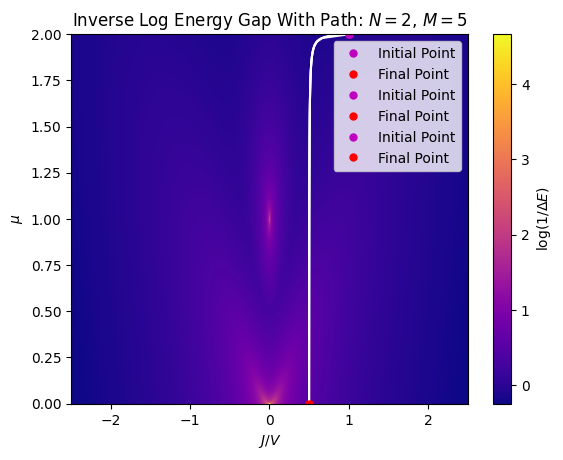

In [4]:
mu = 2

init_J = 0.01
init_V = 0.01

J = 1
V = 2

t_total = 100


plt.figure()
methods = ["linear", "cubic", "smoothstep"]

for method in methods:

    mu_array = interpolate_parameters(mu, 0, t_total, method = method) 
    J_array = interpolate_parameters(init_J, J, t_total, method = method) 
    V_array = interpolate_parameters(init_V, V, t_total, method = method) 

    J_V_ratio_array = J_array/V_array

    plt.pcolormesh(J_V_ratio_grid, mu_grid, np.log10(one_over_energy_gap_grid), shading='auto', cmap='plasma')
    plt.plot(J_V_ratio_array, mu_array, color='white', linestyle='-', markersize=1)

    plt.plot(J_V_ratio_array[0], mu_array[0], 'mo', markersize=5, label='Initial Point')
    plt.plot(J_V_ratio_array[-1], mu_array[-1], 'ro', markersize=5, label='Final Point')


plt.xlabel("$J/V$")
plt.ylabel("$\mu$")
plt.title(f"Inverse Log Energy Gap With Path: $N=${N}, $M=${M}")
plt.colorbar(label="$\log(1/\Delta E)$")
plt.legend()